<a href="https://colab.research.google.com/github/martabukow/PSI/blob/main/lab4/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konwolucyjne sieci neuronowe

Dziś spróbujemy stworzyć i wytrenować prostą sieć konwolucyjną do rozpoznawania, co znajduje się na obrazie. Następnie omówimy kwestię identyfikowania obiektów na obrazie, oraz porozmawiamy o wykorzystaniu gotowej już sieci.

## Problem klasyfikacji obrazów

Jak się za to zabrać? Naiwnym podejściem byłaby próba ręcznej specyfikacji pewnych cech (niemowlęta mają duże głowy, szczoteczki są długie, etc.). Szybko jednak stwierdziliśmy, że nawet dla niewielkiego zbioru kategorii jest to tytaniczna praca bez gwarancji sukcesu. Co więcej, istnieje wiele czynników zniekształcających zawartość naszych zdjęć. Obiekty mogą być przedstawiane z różnych ujęć, w różnych warunkach oświetleniowych, w różnej skali, częściowo niewidoczne, ukryte w tle...

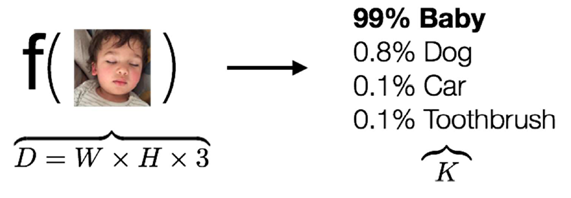


Wszystkie wymienione problemy są skutkiem istnienia semantycznej przepaści między tym, jak reprezentowane są nasze dane wejściowe (tablica liczb), a tym, czego w nich szukamy, czyli kategorii i cech: zwierząt, nosów, głów, itp. Zamiast więc próbować samodzielnie napisać funkcję $f(x)$, spróbujemy skorzystać z dobrodziejstw uczenia maszynowego, aby automatycznie skonstruować reprezentację wejścia właściwą dla postawionego sobie zadania (a przynajmniej lepszą od pierwotnej). I tu z pomocą przychodzą nam konwolucyjne sieci neuronowe. Do tego trzeba zrozumieć, czym jest konwolucja (inaczej: splot), a do tego najlepiej nadają się ilustracje, jak to działa.

### Konwolucja

Konwolucja (splot) to działanie określone dla dwóch funkcji, dające w wyniku inną, która może być postrzegana jako zmodyfikowana wersja oryginalnych funkcji.

Z naszego punktu widzenia polega to na tym, że mnożymy odpowiadające sobie elementy z dwóch macierzy: obrazu, oraz mniejszej, nazywanej filtrem (lub kernelem. Następnie sumujemy wynik i zapisujemy do macierzy wynikowej na odpowiedniej pozycji. Proces powtarza się aż do momentu przeskanowania całego obrazu. Taki filtr wykrywa, czy coś do niego pasuje w danym miejscu, i z tego wynika zdolność semantycznej generalizacji sieci - uczymy się cech, a wykrywamy je potem w dowolnym miejscu. [Przydatne pojęcia](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

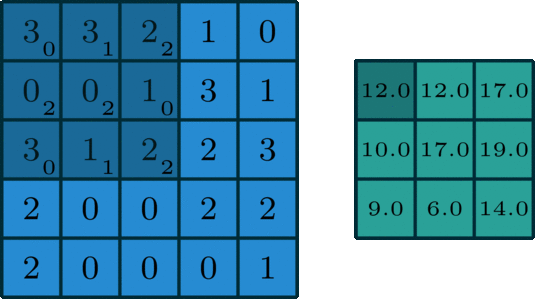

### Stride

Stride to inaczej *krok algorytmu*, albo *przesunięcie*. Określa co ile komórek macierzy następuje aplikacja operatora konwolucji. Jeśli stride wynosi 1 a operator konwolucji ma rozmiar np. 3 x 3, to każdy piksel (z wyjątkiem skrajnych narożnych pikseli) będzie uczestniczył w wielu operacjach konwolucji. Jeśli natomiast krok wyniósłby 3, to każdy piksel uczestniczyłby tylko jednokrotnie w tych operacjach. Należy pamiętać, że krok stosujemy zarówno w poziomie, jak i pionie. Najczęściej w obu kierunkach wykorzystuje się ten sam krok.


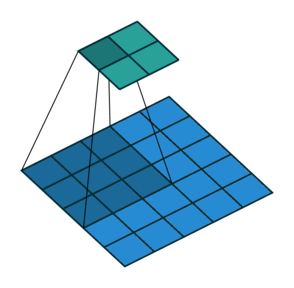



### Padding

Padding to inaczej *wypełnienie* krawędzi obrazu. Określa, w jaki sposób będą traktowane skrajne piksele. Jeśli padding wynosi 0, to skrajne piksele będą uczestniczyły w operacjach konwolucji rzadziej, niż pozostałe piksele (oczywiście jest to również uzależnione od wartości kroku). Aby zniwelować ten efekt, możemy dodać wypełnienie wokół całego obrazu. Te dodatkowe piksele mogą być zerami, albo mogą być również jakimiś uśrednionymi wartościami pikseli sąsiednich. Wypełnienie zerami oznacza de facto obramowanie całego obrazu czarną ramkną.

[Więcej na temat wypełnienia.](https://www.geeksforgeeks.org/cnn-introduction-to-padding/)

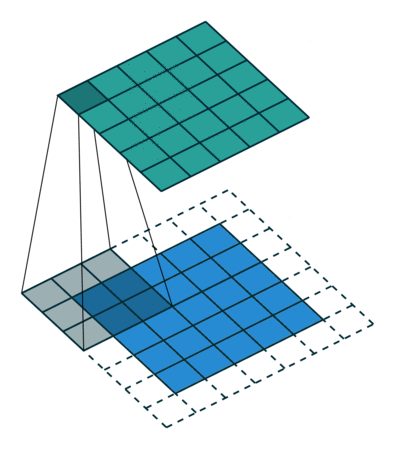

### Pooling

Pooling jest procesem wykorzystywanym do redukcji rozmiaru obrazu.
Występują 2 warianty: *max-pooling* oraz *avg-pooling*. Pozwala on usunąć zbędne dane, np. jeżeli filtr wykrywa linie, to istnieje spora szansa, że linie te ciągną się przez sąsiednie piksele, więc nie ma powodu powielać tej informacji. Dzięki temu wprowadzamy pewną inwariancję w wagach sieci i jesteśmy odporni na niewielkie wahania lokalizacji informacji, a skupiamy się na "większym obrazie".

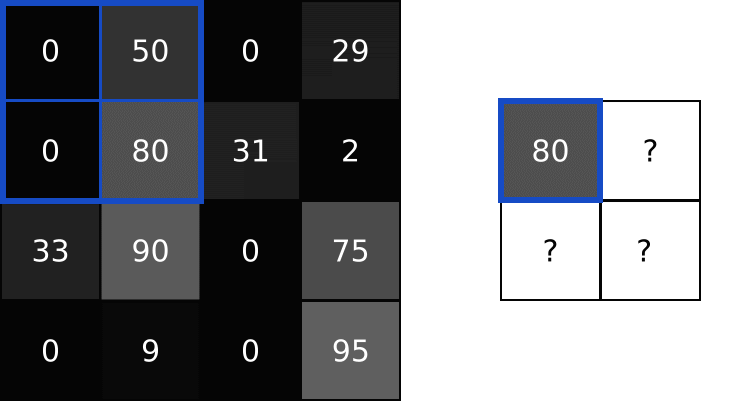

### Sposoby redukcji przeuczenia

* warstwa dropout - wyłączanie losowych neuronów w trakcie uczenia,
* regularyzacja wag - ograniczenie sumy wartości wag,
* metoda wczesnego stopu (early stopping) - zatrzymanie uczenia, jeśli proces uczenia nie poprawia wyników,
* normalizacja paczki (batch normalization) - centrowanie i skalowanie wartości wektorów *w obrębie batcha danych*,
* rozszerzanie danych (data augmentation) - generowanie lekko zaburzonych danych, na podstawie danych treningowych,
* lub... więcej danych.

### Budowa sieci CNN do klasyfikacji obrazów

Sieć konwolucyjna składa się zawsze najpierw, zgodnie z nazwą, z części konwolucyjnej, której zadaniem jest wyodrębnienie przydatnych cech z obrazu za pomocą filtrów, warstw poolingowych etc.

Warstwa konwolucyjna sieci neuronowej składa się z wielu filtrów konwolucyjnych działających równolegle (tj. wykrywających różne cechy). Wagi kerneli, początkowo zainicjalizowane losowo, są dostrajane w procesie uczenia. Wynik działania poszczególnych filtrów jest przepuszczany przez funkcję nieliniową. Mamy tu do czynienia z sytuacją analogiczną jak w MLP: najpierw wykonujemy przekształcenie liniowe, a potem stosujemy funkcję aktywacji. Funkcji aktywacji nie stosuje się jendak po warstawch poolingowych, są to stałe operacje nie podlegające uczeniu.

W celu klasyfikacji obrazu musimy później użyć sieci MLP. Jako że wejściem do sieci MLP jest zawsze wektor, a wyjściem warstwy konwolucyjnej obraz. Musimy zatem obraz przetworzony przez filtry konwolucyjne sprowadzić do formy wektora, tzw. **embedding-u / osadzenia**, czyli reprezentacji obrazu jako punktu w pewnej ciągłej przestrzeni. Służy do tego warstwa spłaszczająca (flatten layer), rozwijająca macierze wielkowymiarowe na wektor, np $10 \times 10 \times 3$ na $300 \times 1$.

Część konwolucyjna nazywa się często **backbone**, a część MLP do klasyfikacji **head**. Głowa ma zwykle 1-2 warstwy w pełni połączone, z aktywacją softmax w ostatniej warstwie. Czasem jest nawet po prostu pojedynczą warstwą z softmaxem, bo w dużych sieciach konwolucyjnych ekstrakcja cech jest tak dobra, że taka prosta konstrukcja wystacza do klasyfikacji embeddingu.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

Wybierzmy rodzaj akceleracji. Współczesne wersje PyTorch wspierają akcelerację nie tylko na kartach Nvidii i AMD, ale również na procesorach Apple z serii M. Obsługa AMD jest realizowana identycznie jak CUDA natomiast MPS (Apple) ma nieco inne API do sprawdzania dostępności i wybierania urządzenia.
Zapisujemy wybrane urządzenie do zmiennej `device`, dzięki czemu w dalszych częściach kodu już nie będziemy musieli o tym myśleć.

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

print(device)

cuda:0


W pakiecie torchvision mamy funkcje automatycznie pobierające niektóre najbardziej popularne zbiory danych z obrazami.

W tym ćwiczeniu wykorzystamy zbiór FashionMNIST, który zawiera małe (28x28) zdjęcia ubrań w skali szarości. Zbiór ten został stworzony przez Zalando i jest "modowym" odpowiednikiem "cyferkowego" MNIST-a, jest z nim kompatybilny pod względem rozmiarów i charakterystyki danych, ale jest od MNIST-a trudniejszy w klasyfikacji.

Do funkcji ładujących zbiory danych możemy przekazać przekształcenie, które powinno zostać na nim wykonane. Przekształcenia można łączyć przy użyciu `transforms.Compose`. W tym przypadku przekonwertujemy dane z domyślnej reprezentacji PIL.Image na torch-owe tensory.

Pobrany dataset przekazujemy pod kontrolę DataLoader-a, który zajmuje się podawaniem danych w batch-ach podczas treningu.

In [4]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 32

trainset = torchvision.datasets.FashionMNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True
)

testset = torchvision.datasets.FashionMNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=True
)

classes = (
    "top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
)

print(type(testset[0][0]))

100%|██████████| 26.4M/26.4M [00:02<00:00, 13.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 210kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.85MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.99MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

<class 'torch.Tensor'>


Zobaczmy, co jest w naszym zbiorze danych. Poniżej kawałek kodu, który wyświetli nam kilka przykładowych obrazków. Wartości pikseli są znormalizowane do przedziału [0,1].

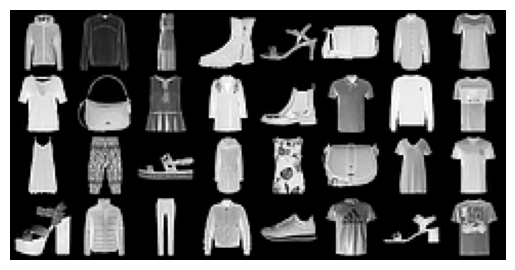

Coat       Pullover   Dress      Ankle boot Sandal     Bag        Shirt      Shirt     
top        Bag        top        Coat       Ankle boot top        Pullover   top       
Dress      Trouser    Sandal     Coat       Shirt      Bag        Dress      top       
Sandal     Coat       Trouser    Coat       Sneaker    top        Sandal     top       


In [5]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)

def grid_show(images, nrow=8):
    imshow(torchvision.utils.make_grid(images, nrow=nrow))


def print_grid(labels, nrow=8):
    rows = [labels[n : n + nrow] for n in range(0, len(labels), nrow)]
    for r in rows:
        print(" ".join(f"{classes[c]:10s}" for c in r))

grid_show(images)
print_grid(labels)

## LeNet

LeNet to bardzo znany, klasyczny model sieci konwolucyjnej.

Warstwy:
- obraz
- konwolucja, kernel $5 \times 5$, bez paddingu, 6 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- konwolucja, kernel $5 \times 5$, bez paddingu, 16 kanałów (feature maps)
- average pooling, kernel $2 \times 2$, stride 2
- warstwa w pełni połączona, 120 neuronów na wyjściu
- warstwa w pełni połączona, 84 neurony na wyjściu
- warstwa w pełni połączona, na wyjściu tyle neuronów, ile jest klas

### Zadanie 1 (2 punkty)


Zaimplementuj wyżej opisaną sieć, używając biblioteki PyTorch. Wprowadzimy sobie jednak pewne modyfikacje, żeby było ciekawiej:
- w pierwszej warstwie konwolucyjnej użyj 20 kanałów (feature maps)
- w drugiej warstwie konwolucyjnej użyj 50 kanałów (feature maps)
- w pierwszej warstwie gęstej użyj 300 neuronów
- w drugiej warstwie gęstej użyj 100 neuronów

Przydatne elementy z pakietu `torch.nn`:
* `Conv2d()`
* `AvgPool2d()`
* `Linear()`

Z pakietu `torch.nn.functional`:
* `relu()`

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        # your code here
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5)
        self.pool1 = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(20, 50, kernel_size=5)
        self.pool2 = nn.AvgPool2d(2, stride=2)
        self.fc1 = nn.Linear(50 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # your code here
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.reshape(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# your_code


In [7]:
lenet = LeNet()
param_num = sum(p.numel() for p in lenet.parameters())
assert param_num == 132704
print("Solution is correct!")





Solution is correct!


Do treningu użyjemy stochastycznego spadku po gradiencie (SGD), a jako funkcję straty Categorical Cross Entropy. W PyTorch-u funkcja ta operuje na indeksach klas (int), a nie na wektorach typu one-hot (jak w Tensorflow).

In [8]:
import torch.optim as optim

net = LeNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### Zadanie 2 (1 punkt)

Uzupełnij pętlę uczącą sieć na podstawie jej predykcji. Oblicz (wykonaj krok do przodu) funkcję straty, a następnie przeprowadź propagację wsteczną i wykonaj krok optymalizatora.

In [9]:
net.train()

for epoch in range(5):
  # your_code
  for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = net(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



Zobaczmy na kilku przykładach jak działa wytrenowana sieć.

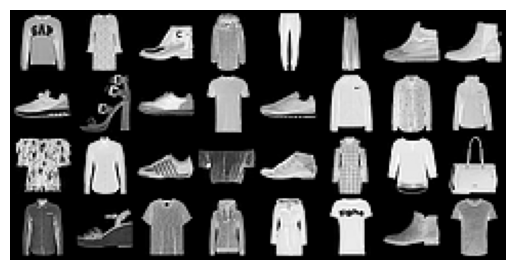

Ground Truth
Pullover   Dress      Ankle boot Coat       Trouser    Dress      Sneaker    Ankle boot
Sneaker    Sandal     Sneaker    top        Sneaker    Coat       Shirt      Coat      
Shirt      Shirt      Sneaker    Shirt      Ankle boot Dress      Shirt      Bag       
Shirt      Sandal     top        Coat       Coat       top        Ankle boot top       

Predicted
Pullover   Dress      Ankle boot Coat       Trouser    Dress      Ankle boot Ankle boot
Sneaker    Sandal     Sneaker    top        Sneaker    Coat       Pullover   Coat      
top        Shirt      Sneaker    Bag        Sneaker    Coat       Pullover   Bag       
Shirt      Sandal     top        Coat       Dress      top        Ankle boot top       


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

grid_show(images)
print("Ground Truth")
print_grid(labels)

outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print()
print("Predicted")
print_grid(predicted)

Obliczmy dokładności (accuracy) dla zbioru danych.

In [11]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 81 %


Skomentuj wyniki:

*   Dokładność 81% jest całkiem dobra


Znając ogólny wynik klasyfikacji dla zbioru przeanalizujmy dokładniej, z którymi klasami jest największy problem.

### Zadanie 3 (1 punkt)

Oblicz dokładność działania sieci (accuracy) dla każdej klasy z osobna. Podczas oceniania skuteczności modelu nie potrzebujemy, aby gradienty się liczyły. Możemy zatem zawrzeć obliczenia w bloku `with torch.no_grad():`

In [14]:
net.eval()


# your_code

class_correct = [0] * 10
class_total = [0] * 10

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i].item()
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i, classname in enumerate(classes):
    accuracy = 100 * class_correct[i] / class_total[i]
    print(f"Accuracy for class {classname:15s} is {accuracy:.1f} %")


Accuracy for class top             is 84.2 %
Accuracy for class Trouser         is 95.4 %
Accuracy for class Pullover        is 70.6 %
Accuracy for class Dress           is 81.5 %
Accuracy for class Coat            is 72.0 %
Accuracy for class Sandal          is 94.3 %
Accuracy for class Shirt           is 36.2 %
Accuracy for class Sneaker         is 91.0 %
Accuracy for class Bag             is 94.2 %
Accuracy for class Ankle boot      is 93.2 %


Skomentuj wyniki:

*   Najmniejszą dokładność  ma klasa Shirt, a największą Trouser

## Detekcja obiektów

Problem detekcji polega na nie tylko sklasyfikowaniu obiektów na obrazie, ale również wyznaczeniu jego dokładnego położenia w postaci bounding-box-u.
Choć jest to problem odmienny od klasyfikacji obrazów, to w praktyce ściśle z nim powiązany - modele do detekcji obiektów przeważnie do pewnego momentu wyglądają tak samo, jak modele klasyfikacji. Jednak pod koniec sieć jest dzielona na 2 wyjścia: jedno to standardowa klasyfikacja, a drugie to regresor określający pozycję obiektu na obrazie, tzw. bounding box. Najpopularniejszymi przykładami takich sieci są YOLO i Mask R-CNN. Zbiór danych też jest odpowiednio przygotowany do tego zadania i oprócz właściwych zdjęć zawiera również listę bounding-box-ów i ich etykiety.

Zobaczymy jak działa detekcja na przykładzie już wytrenowanej sieci neuronowej. Autorzy skutecznych sieci często udostępniają ich wagi online, dzięki czemu jeżeli mamy doczynienia z analogicznym problemem jak ten, do którego dana sieć była przygotowana możemy z niej skorzystać "prosto z pudełka".

PyTorch pozwala nam na pobranie wytrenowanych wag dla kilku najpopularniejszych modeli. Sprawdzimy jak z tego skorzystać.

In [15]:
from torchvision.models import detection
import numpy as np
import cv2
from PIL import Image
import urllib

Poniżej znajduje się funkcja pozwalająca wczytać obraz z sieci. Przyda się do testowania działania sieci.

In [16]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

Model, którym się zajmiemy to Faster R-CNN, który był trenowany na zbiorze COCO. Poniżej znajduje się lista klas (etykiet) dla tego zbioru danych.

In [17]:
classes = [
    "__background__",
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "street sign",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "hat",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "shoe",
    "eye glasses",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "plate",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "mirror",
    "dining table",
    "window",
    "desk",
    "toilet",
    "door",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "blender",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

colors = np.random.randint(0, 256, size=(len(classes), 3))

Inizjalizacja modelu ResNet50-FPN wytrenowanymi wagami. Inicjalizujemy zarówno sieć backbone jak i RCNN.

In [18]:
model = detection.fasterrcnn_resnet50_fpn(
    weights=detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT,
    weights_backbone=torchvision.models.ResNet50_Weights.DEFAULT,
    progress=True,
    num_classes=len(classes)
).to(device)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:00<00:00, 182MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

IPython, z którego korzystamy w Jupyter Notebooku, ma wbudowaną funkcję `display()` do wyświetlania obrazów.

Do pobierania obrazów możemy się posłyżyć wget-em.

In [19]:
# Pobieranie obrazka z sieci
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg --output-document toothbrushes.jpg

--2024-12-02 11:08:18--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Toothbrush_x3_20050716_001.jpg/1280px-Toothbrush_x3_20050716_001.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 339825 (332K) [image/jpeg]
Saving to: ‘toothbrushes.jpg’

toothbrushes.jpg    100%[===================>] 331.86K  1.94MB/s    in 0.2s    

2024-12-02 11:08:19 (1.94 MB/s) - ‘toothbrushes.jpg’ saved [339825/339825]



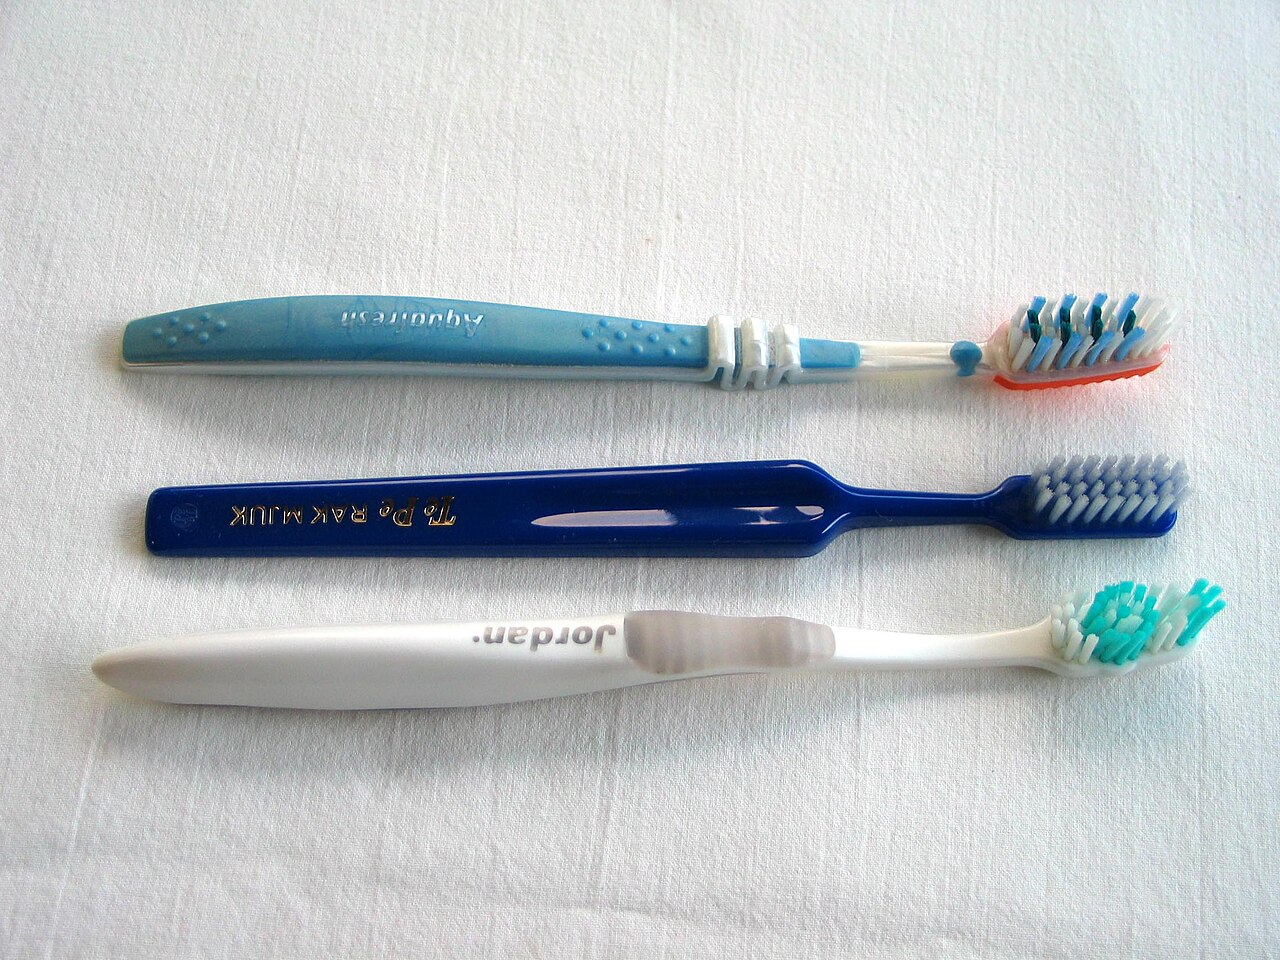

In [20]:
# Wyświetlanie obrazka
image = Image.open("toothbrushes.jpg")
# make sure we have 3-channel RGB, e.g. without transparency
image = image.convert("RGB")
display(image)

PyTorch wymaga obrazów w kształcie [channels, height, width] (C, H, W) oraz z wartościami pikseli między 0 a 1. Pillow wczytuje obrazy z kanałami (H, W, C) oraz z wartościami pikseli między 0 a 255. Przed wykorzystaniem sieci neuronowej trzeba zatem:
- zamienić obraz na tensor
- zmienić kolejność kanałów
- podzielić wartości pikseli przez 255

In [21]:
image_tensor = torch.from_numpy(np.array(image))
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor_int = image_tensor  # useful for displaying, dtype = uint8
image_tensor = image_tensor / 255
image_tensor.shape, image_tensor.dtype

(torch.Size([3, 960, 1280]), torch.float32)

### Zadanie 4 (1 punkt)

Użyj modelu do wykrycia obiektów na obrazie. Następnie wybierz tylko te bounding boxy, dla których mamy wynik powyżej 50%. Wypisz te bounding boxy, ich prawdopodobieństwa (w procentach) oraz nazwy klas.

Następnie wykorzystaj wyniki do zaznaczenia bounding box'a dla każdego wykrytego obiektu na obrazie oraz podpisz wykrytą klasę wraz z prawdopodobieństwem. Możesz tutaj użyć:
- [OpenCV](https://stackoverflow.com/questions/56108183/python-opencv-cv2-drawing-rectangle-with-text)
- [PyTorch - Torchvision](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-bounding-boxes)

In [ ]:
# your_code


## Fine-tuning i pretrening

Trenowanie głębokich sieci neuronowych do przetwarzania obrazów jest zadaniem wymagającym bardzo dużych zbiorów danych i zasobów obliczeniowych. Często jednak, nie musimy trenować takich sieci od nowa, możemy wykorzystać wytrenowane modele i jedynie dostosowywaać je do naszych problemów. Działanie takie nazywa się transfer learning-iem.

Przykładowao: mamy już wytrenowaną sieć na dużym zbiorze danych (pretrening) i chcemy, żeby sieć poradziła sobie z nową klasą obiektów (klasyfikacja), albo lepiej radziła sobie z wybranymi obiektami, które już zna (fine-tuning). Możemy usunąć ostatnią warstwę sieci i na jej miejsce wstawić nową, identyczną, jednak z losowo zainicjalizowanymi wagami, a następnie dotrenować sieć na naszym nowym, bardziej specyficznym zbiorze danych. Przykładowo, jako bazę weźmiemy model wytrenowany na zbiorze ImageNet i będziemy chcieli użyć go do rozpoznawania nowych, nieznanych mu klas, np. ras psów.

Dla przećwiczenia takiego schematu działania wykorzystamy zbiór danych z hotdogami. Będziemy chcieli stwierdzić, czy na obrazku jest hotdog, czy nie. Jako sieci użyjemy modelu ResNet-18, pretrenowanej na zbiorze ImageNet.

In [ ]:
# Download the hotdog dataset
!wget http://d2l-data.s3-accelerate.amazonaws.com/hotdog.zip
!unzip -n hotdog.zip

Kiedy korzystamy z sieci pretrenowanej na zbiorze ImageNet, zgodnie [z dokumentacją](https://pytorch.org/vision/0.8/models.html) trzeba dokonać standaryzacji naszych obrazów, odejmując średnią i dzieląc przez odchylenie standardowe każdego kanału ze zbioru ImageNet.

```
All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are
expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229,
0.224, 0.225]. You can use the following transform to normalize:

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

```

In [ ]:
torch.manual_seed(17)

normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)

train_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.RandomResizedCrop(224),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

test_augs = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize(256),
        torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        normalize,
    ]
)

In [ ]:
pretrained_net = torchvision.models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

In [ ]:
pretrained_net.fc

### Zadanie 5 (1 punkt)

Zastąp wyjściową warstwę liniową naszej fine-fune'owanej sieci nową warstwą o odpowiedniej liczbie wyjść i zainicjuj ją losowymi wartościami.

In [ ]:
finetuned_net = ... # your code here
# your_code


In [ ]:
assert finetuned_net.fc.out_features == 2
print("Solution is correct!")

Poniżej znajduje się pętla ucząca, która dotrenuje nasz detektor hot-dog-ów.

In [ ]:
import time
import copy


def train_model(
    model, dataloaders, criterion, optimizer, num_epochs=25
):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(1, num_epochs + 1):
        print("Epoch {}/{}".format(epoch, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == "train"):
                    # Get model outputs and calculate loss

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.float() / len(dataloaders[phase].dataset)

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == "val":
                val_acc_history.append(epoch_acc)

        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history

Fine-tuning...

In [ ]:
import os

data_dir = "hotdog"
batch_size = 32

model_ft = finetuned_net.to(device)
train_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "train"), transform=train_augs
    ),
    batch_size=batch_size,
    shuffle=True,
)
test_iter = torch.utils.data.DataLoader(
    torchvision.datasets.ImageFolder(
        os.path.join(data_dir, "test"), transform=test_augs
    ),
    shuffle=True,
    batch_size=batch_size,
)
loss = nn.CrossEntropyLoss(reduction="none")

### Zadanie 6 (1 punkt)

Zmodyfikuj tak parametry sieci, aby learning rate dla ostatniej warstwy był 10 razy wyższy niż dla pozostałych.

Trzeba odpowiednio podać pierwszy parametr `torch.optim.SGD` tak, aby zawierał parametry normalne, oraz te z `lr * 10`. Paramety warstw niższych to takie, które mają nazwę inną niż `fc.weight` albo `fc.bias` - może się przydać metoda sieci `named_parameters()`.


In [ ]:
def train_fine_tuning(net, learning_rate, num_epochs=15):

    trainer = torch.optim.SGD(...) # your code here

    dataloaders_dict = {"train": train_iter, "val": test_iter}
    criterion = nn.CrossEntropyLoss()
    model_ft, hist = train_model(
        net, dataloaders_dict, criterion, trainer, num_epochs=num_epochs
    )
    return model_ft, hist


# your_code


In [ ]:
model_ft, hist = train_fine_tuning(model_ft, learning_rate=5e-5)

skomentuj wyniki:

*   

Przy wyświetlaniu predykcji sieci musimy wykonać operacje odwrotne niż te, które wykonaliśmy, przygotowując obrazy do treningu:
- zamienić kolejność kanałów z (C, H, W) na (H, W, C)
- zamienić obraz z tensora na tablicę Numpy'a
- odwrócić normalizację (mnożymy przez odchylenie standardowe, dodajemy średnią) i upewnić się, że nie wychodzimy poza zakres [0, 1] (wystarczy proste przycięcie wartości)

In [ ]:
def imshow(img, title=None):
    img = img.permute(1, 2, 0).numpy()
    means = np.array([0.485, 0.456, 0.406])
    stds = np.array([0.229, 0.224, 0.225])
    img = stds * img + means
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    if title is not None:
        plt.title(title)

    plt.pause(0.001)

In [ ]:
import matplotlib.pyplot as plt
plt.ion()


def visualize_model(model, num_images=6):
    class_names = ["hotdog", "other"]
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_iter):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images // 2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')

                imshow(inputs.data[j].cpu())

                if images_so_far == num_images:
                    return



In [ ]:
visualize_model(model_ft)

## Zadanie dodatkowe (3 punkty)

W zadaniach dotyczących klasyfikacji obrazu wykorzystywaliśmy prosty zbiór danych i sieć LeNet. Teraz zamień zbiór danych na bardziej skomplikowany, np. [ten](http://www.vision.caltech.edu/datasets/cub_200_2011/) lub [ten](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia) (lub inny o podobnym poziomie trudności) i zamiast prostej sieci LeNet użyj bardziej złożonej, np. AlexNet, ResNet, MobileNetV2.
